In [1]:
import pandas
import matplotlib.pyplot as plt
import pickle
import wntr
import wntr.metrics.economic as economics
from testWN import testWN as twm
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook

# Water Network

In [3]:
#inp_file = '../Networks/BWCNdata/c-town_true_network.inp'
inp_file = '../Code/c-town_true_network_simplified_controls.inp'

ctown = twm(inp_file)

/Applications/anaconda3/lib/python3.7/site-packages/wntr/epanet/io.py:2085: UserWarning: Not all curves were used in "../Code/c-town_true_network_simplified_controls.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Get network information:

In [4]:
## nodes = ctown.getNodeName()
links = ctown.getLinkName()
pump_df = pd.DataFrame(np.ones(len(links[0])).reshape(1,-1), columns=links[0])
valves_df = pd.DataFrame(np.ones(len(links[2])).reshape(1,-1), columns=links[2])

In [5]:
pump_df.keys()

Index(['PU2', 'PU5', 'PU6', 'PU8', 'PU10'], dtype='object')

<IPython.core.display.Javascript object>


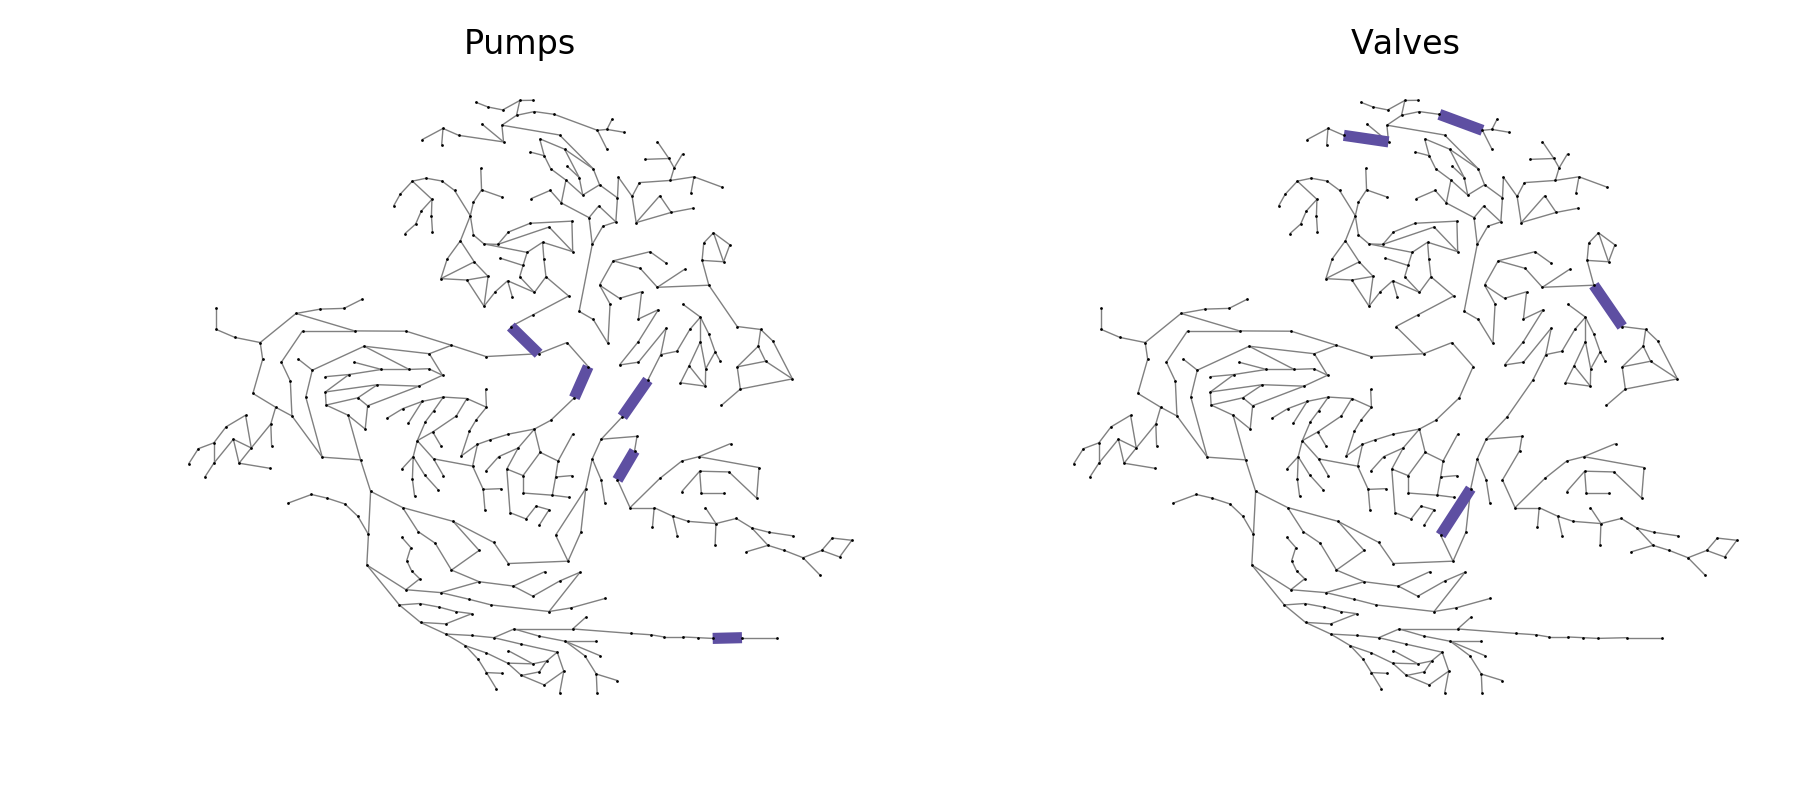

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [6]:
fig_nw, ax_nw = plt.subplots(1,2, figsize=(9,4))
wntr.graphics.plot_network(ctown.wn, link_attribute=pump_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Pumps', ax=ax_nw[0], link_labels=False,node_labels=False)
wntr.graphics.plot_network(ctown.wn, link_attribute=valves_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Valves', ax=ax_nw[1])
fig_nw.tight_layout()

# Results

In [7]:
#with open('results.pkl', 'rb') as f:
with open('results_sim_seed0_0.pkl', 'rb') as f:
    results=pickle.load(f)

In [8]:
results.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

# Plotting

## Nodes

In [9]:
toPlotNames = ctown.getNodeName()

<IPython.core.display.Javascript object>


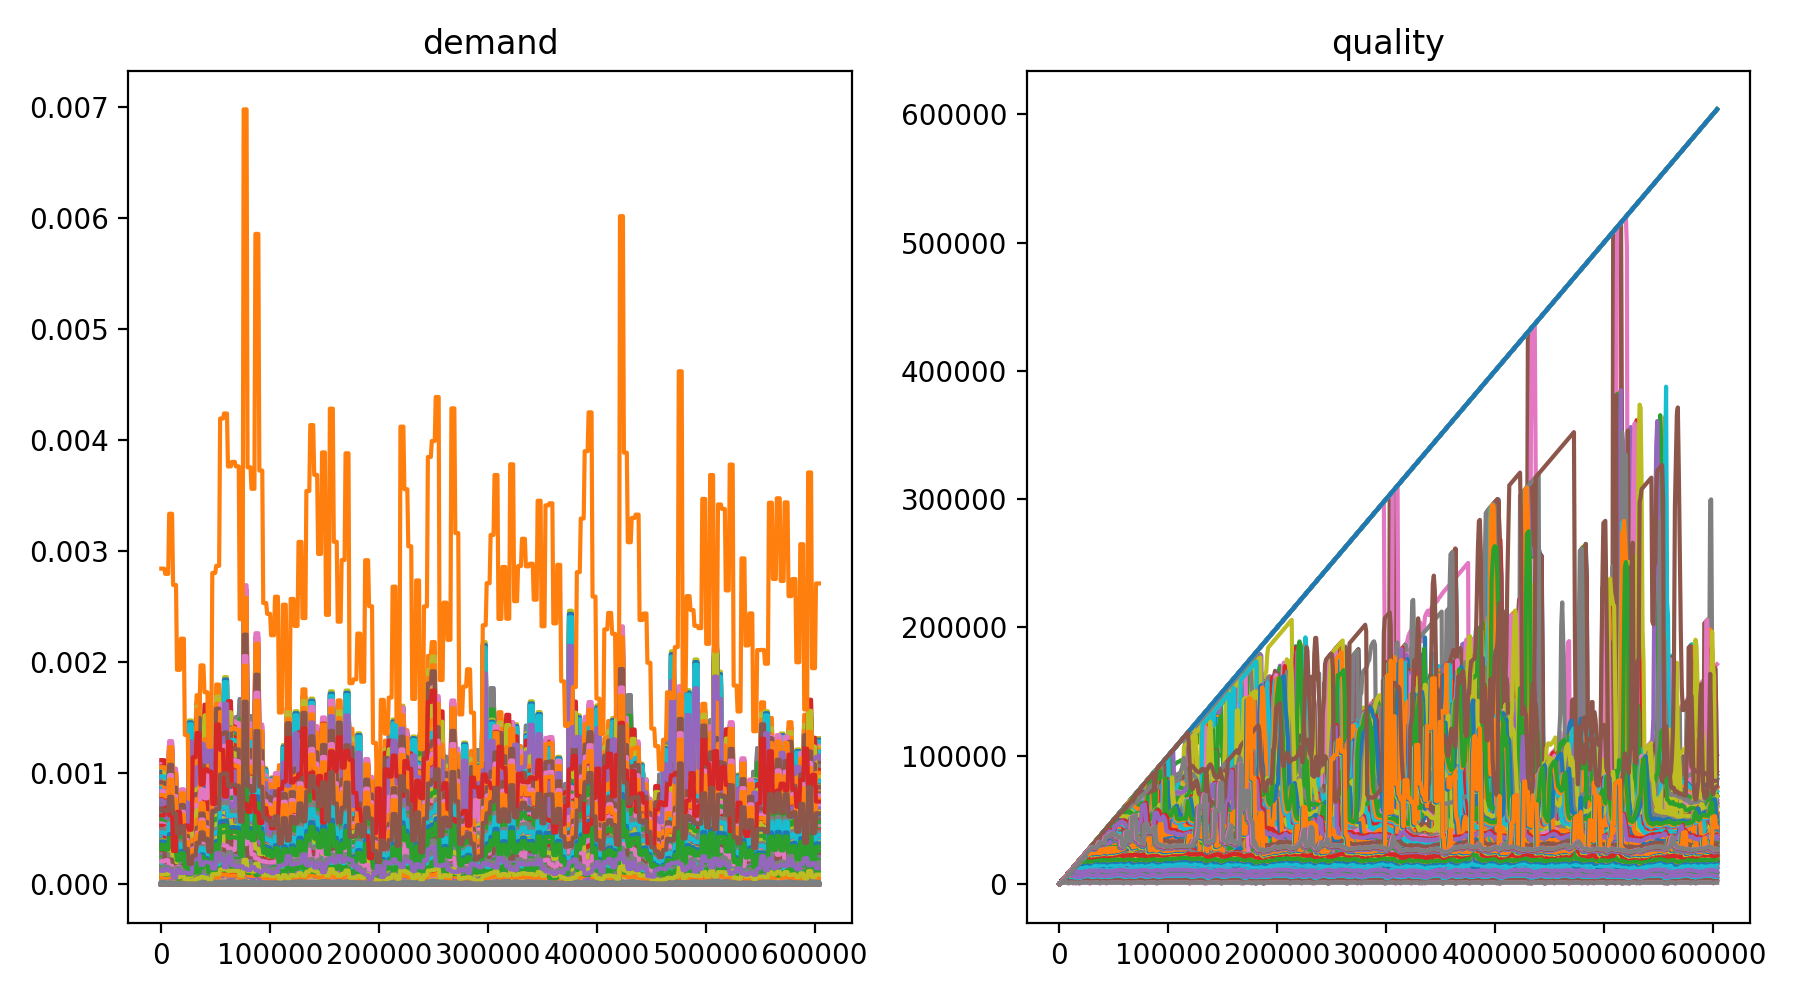

In [10]:
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
ax_1[0].plot(demand)
ax_1[0].set_title('demand')
ax_1[1].plot(quality)
ax_1[1].set_title('quality')
fig_1.tight_layout()



<IPython.core.display.Javascript object>


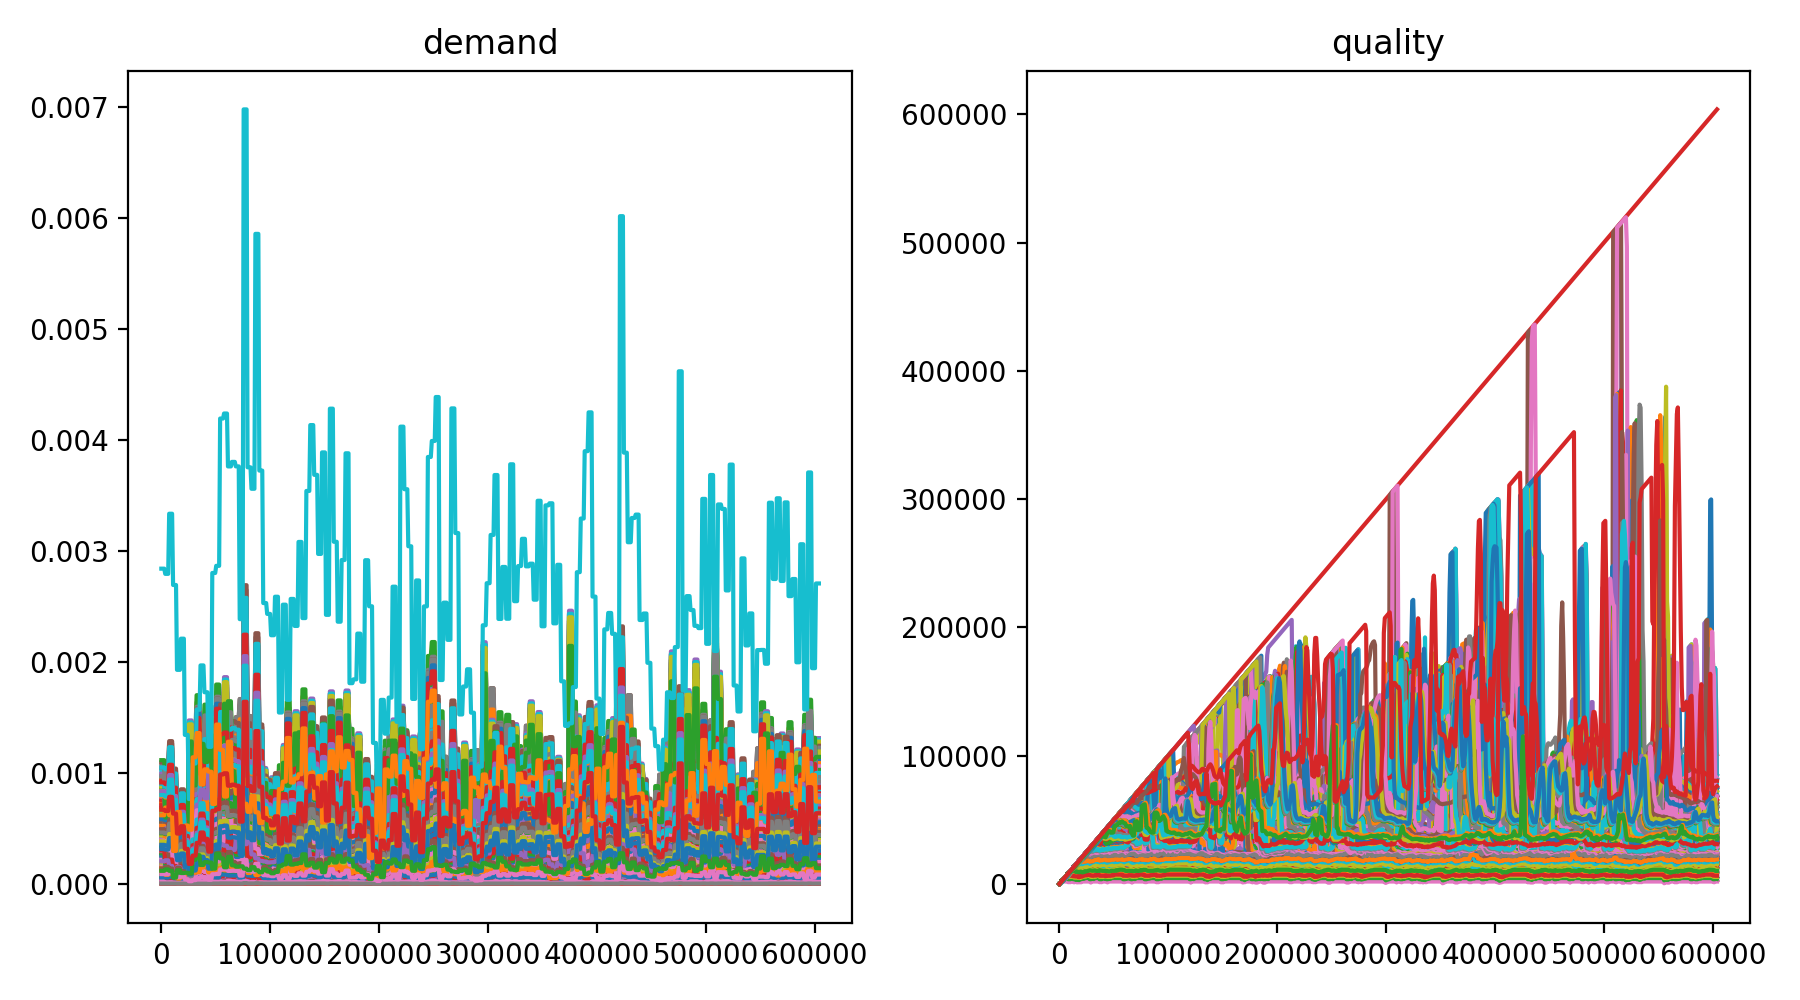

In [11]:
# Same plot, but for only nodes with positive demands
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
position = demand.sum(axis=0) > 0
posdemand = demand.loc[:, position==True]
posquality = quality.loc[:, position==True]
ax_1[0].plot(posdemand)
ax_1[0].set_title('demand')
ax_1[1].plot(posquality)
ax_1[1].set_title('quality')
fig_1.tight_layout()

<IPython.core.display.Javascript object>


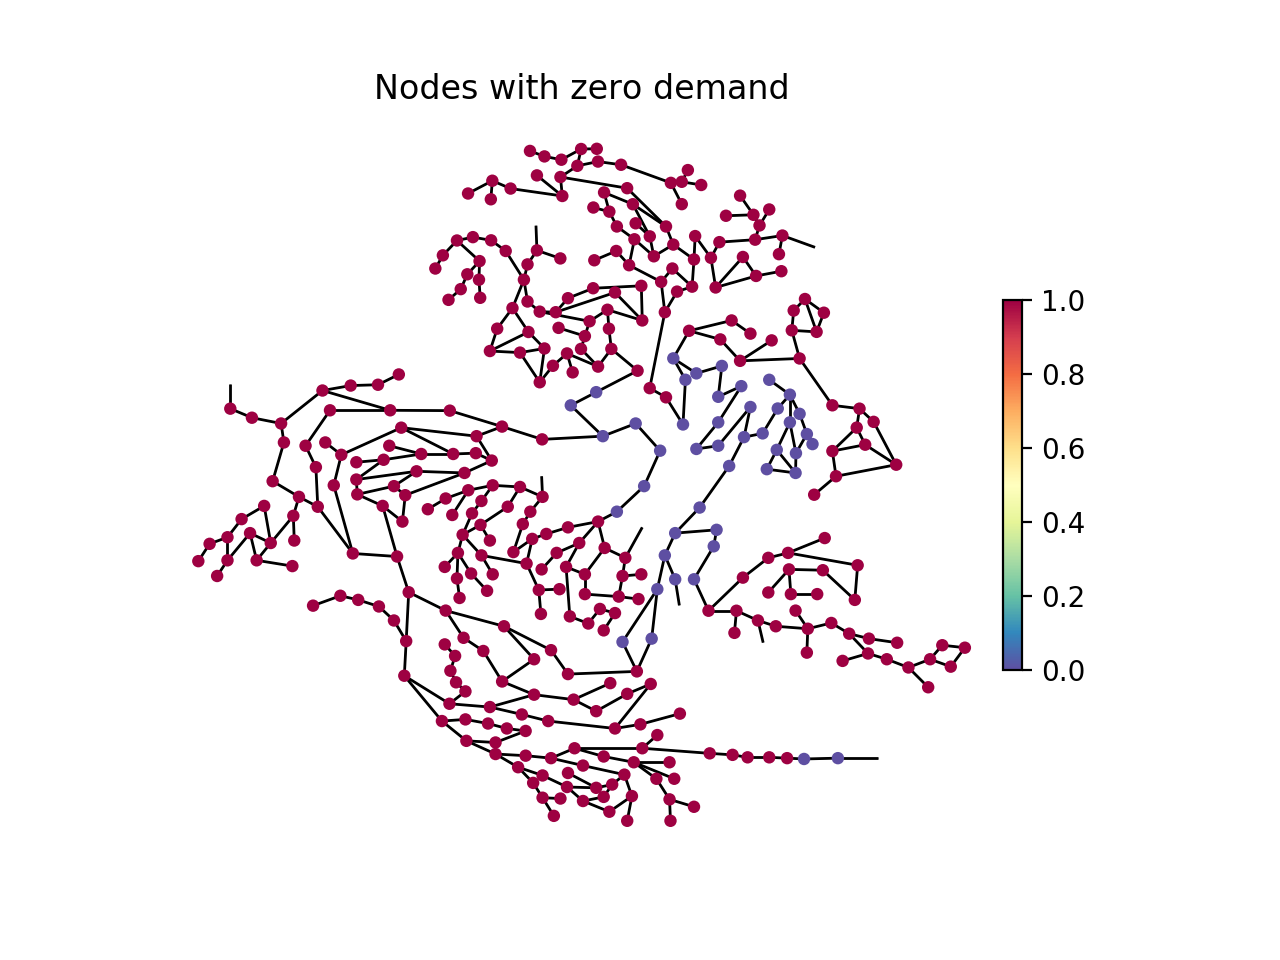

(<matplotlib.collections.PathCollection at 0x101ce98da0>,
 <matplotlib.collections.LineCollection at 0x101ce92208>)

In [12]:
wntr.graphics.plot_network(ctown.wn, node_attribute=position, title='Nodes with zero demand')

<IPython.core.display.Javascript object>


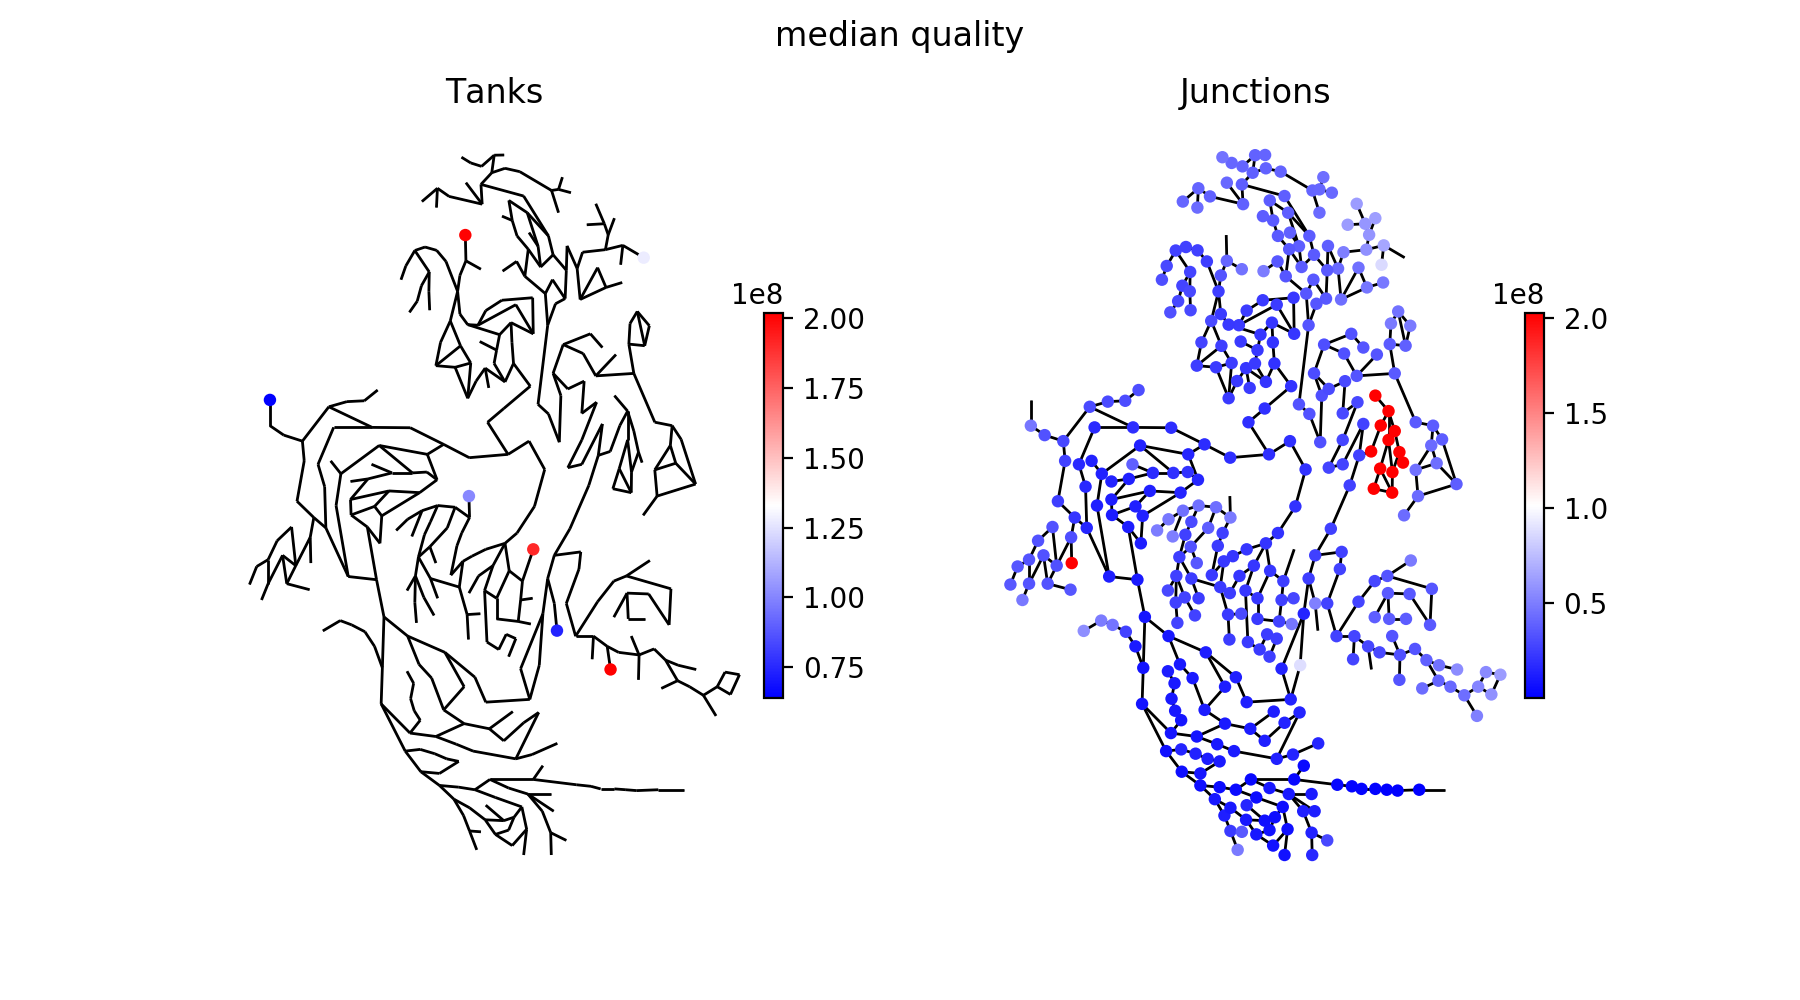

(<matplotlib.collections.PathCollection at 0x101d0e2e80>,
 <matplotlib.collections.LineCollection at 0x101d0ec160>)

In [13]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median quality', fontsize=12)
df = results.node['quality']
df_med = df.sum()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<IPython.core.display.Javascript object>


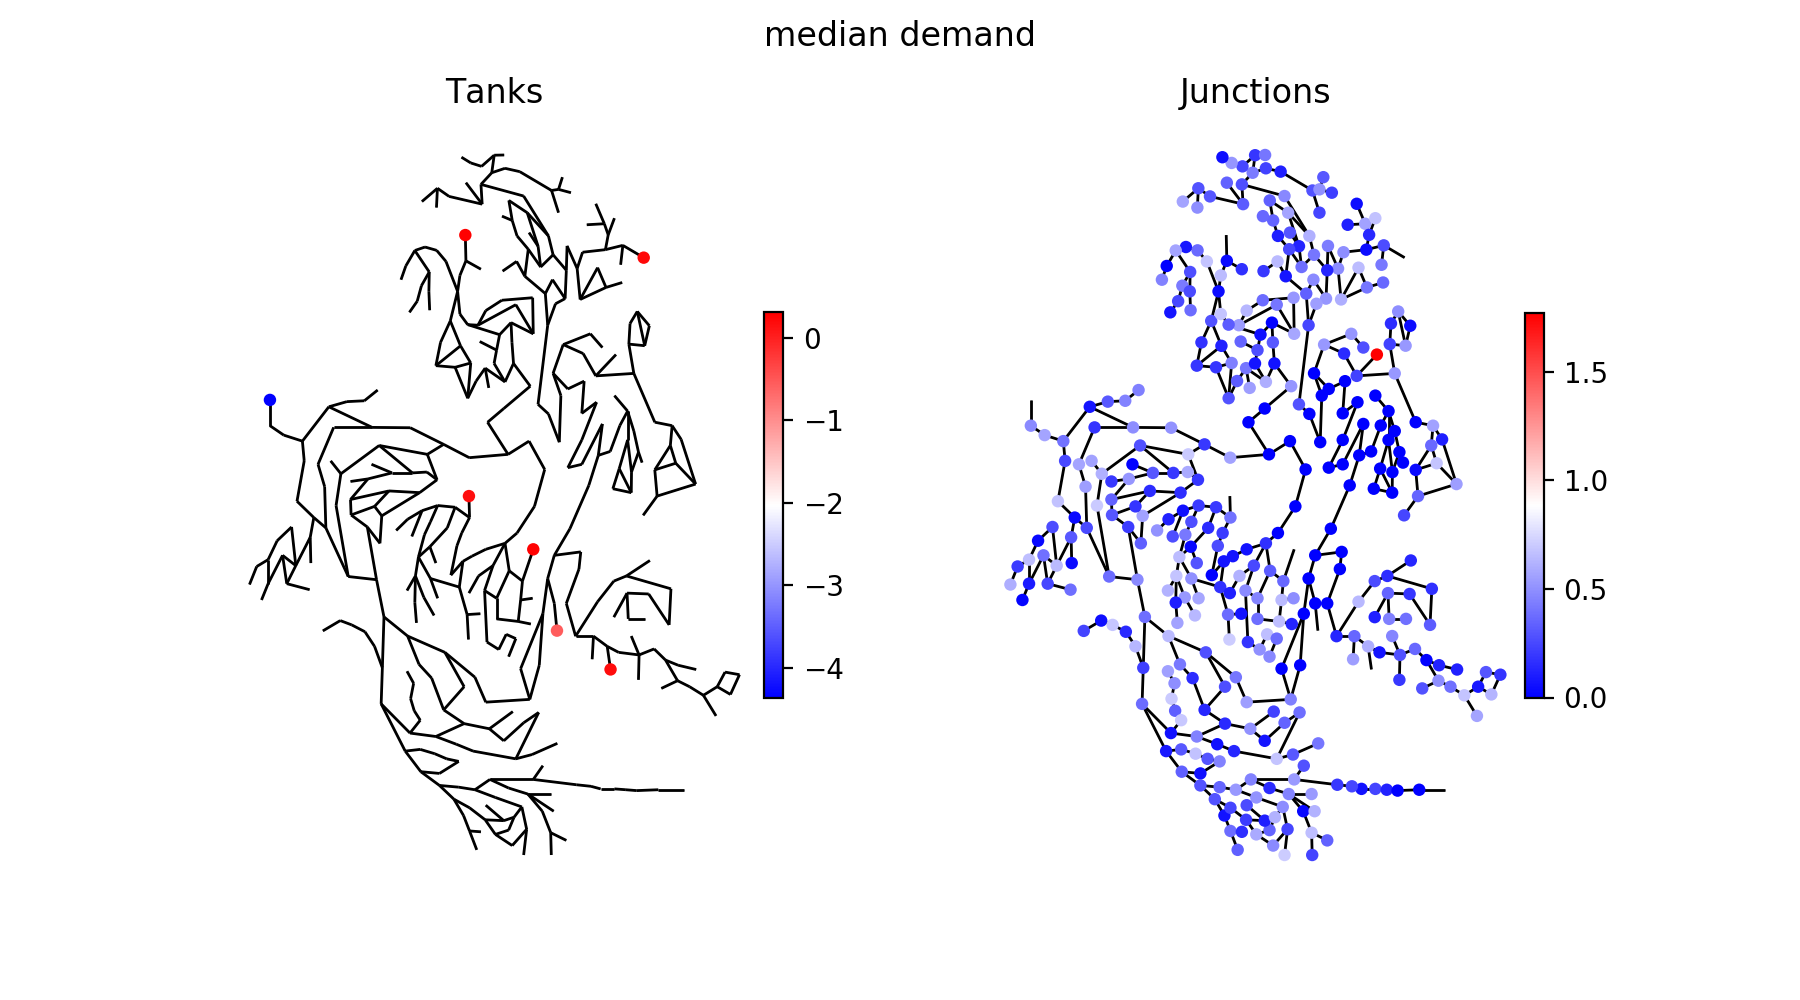

(<matplotlib.collections.PathCollection at 0x101d2cc780>,
 <matplotlib.collections.LineCollection at 0x101d2ccba8>)

In [14]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median demand', fontsize=12)
df = results.node['demand']
df_med = df.sum()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<IPython.core.display.Javascript object>


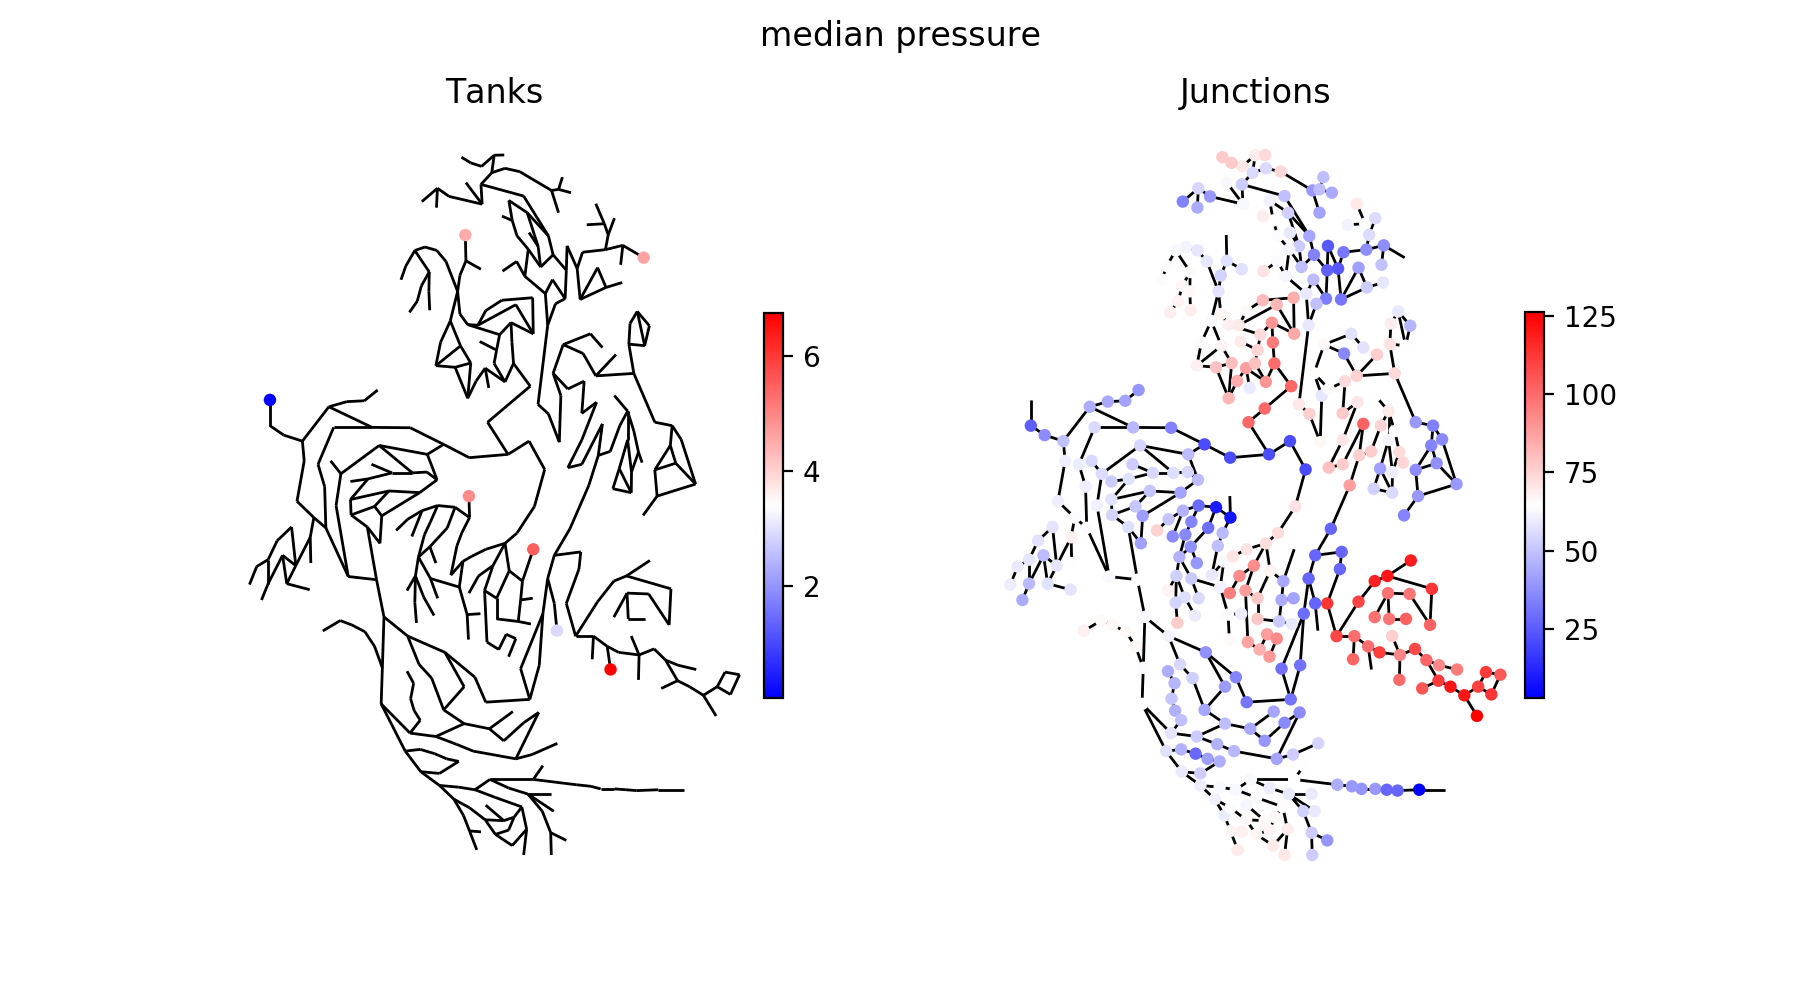

(<matplotlib.collections.PathCollection at 0x101d454668>,
 <matplotlib.collections.LineCollection at 0x101d454908>)

In [15]:
fig_3, ax_3 = plt.subplots(1,2, figsize=(9,5))
fig_3.suptitle('median pressure', fontsize=12)
df = results.node['pressure']
df_med = df.median()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_3[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_3[1])  # junctions

## Links

In [16]:
results.link.keys()

dict_keys(['linkquality', 'flowrate', 'headloss', 'velocity', 'status', 'setting', 'frictionfact', 'rxnrate'])

### Pump 6

<IPython.core.display.Javascript object>


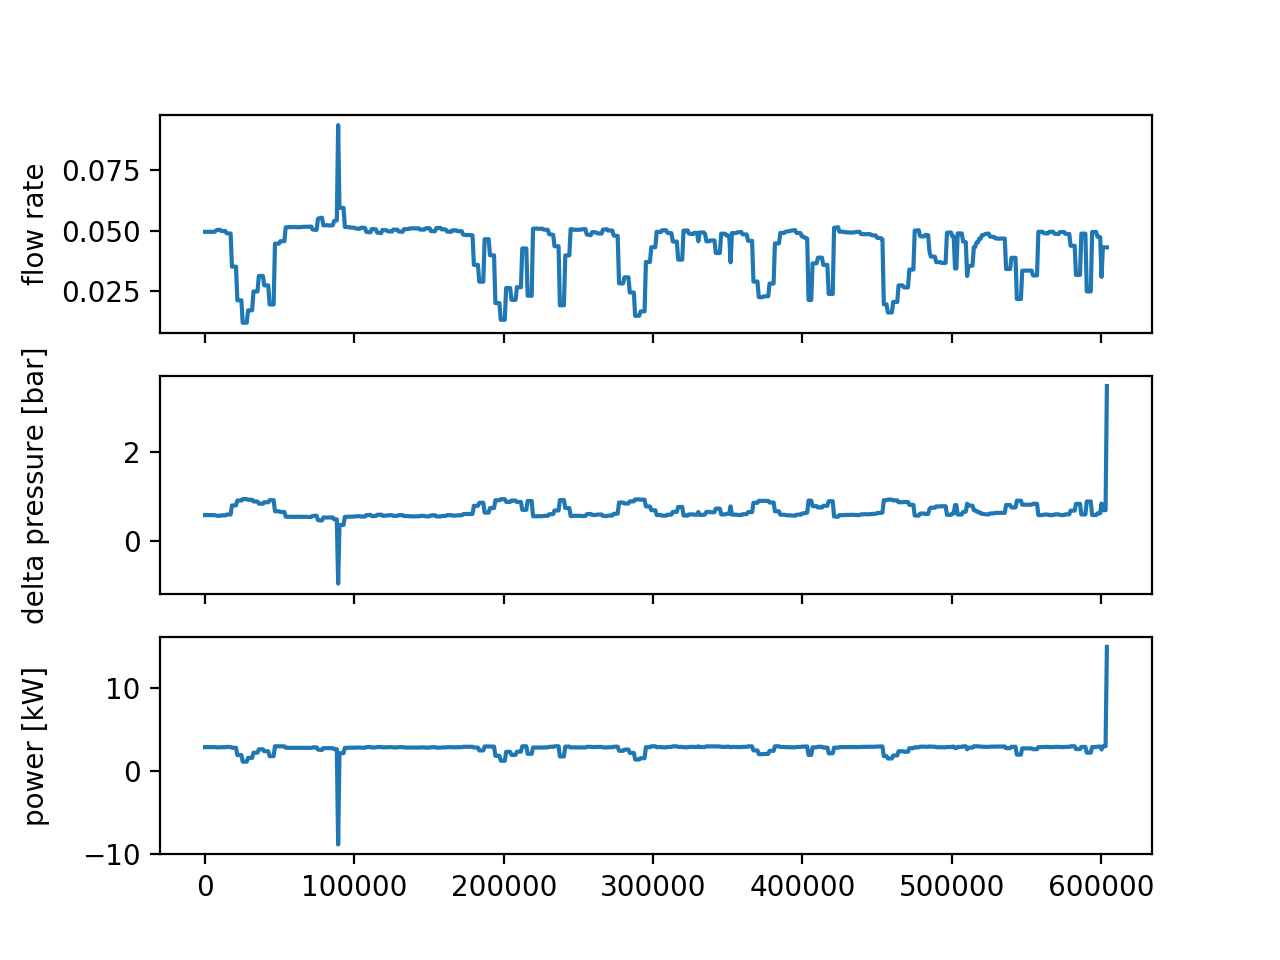

In [17]:
fig_4, ax_4 = plt.subplots(3,1, sharex=True)
v_6 = results.link['flowrate']['PU6']
dp_6 = (results.node['pressure']['J415']-results.node['pressure']['J289'])*1000
p_6 = v_6*dp_6
ax_4[0].plot(v_6)
ax_4[0].set_ylabel('flow rate')
ax_4[1].plot(dp_6/1e5)
ax_4[1].set_ylabel('delta pressure [bar]')
ax_4[2].plot(p_6/1000)
ax_4[2].set_ylabel('power [kW]')

fig_4.align_labels()

### Valve 45

<IPython.core.display.Javascript object>


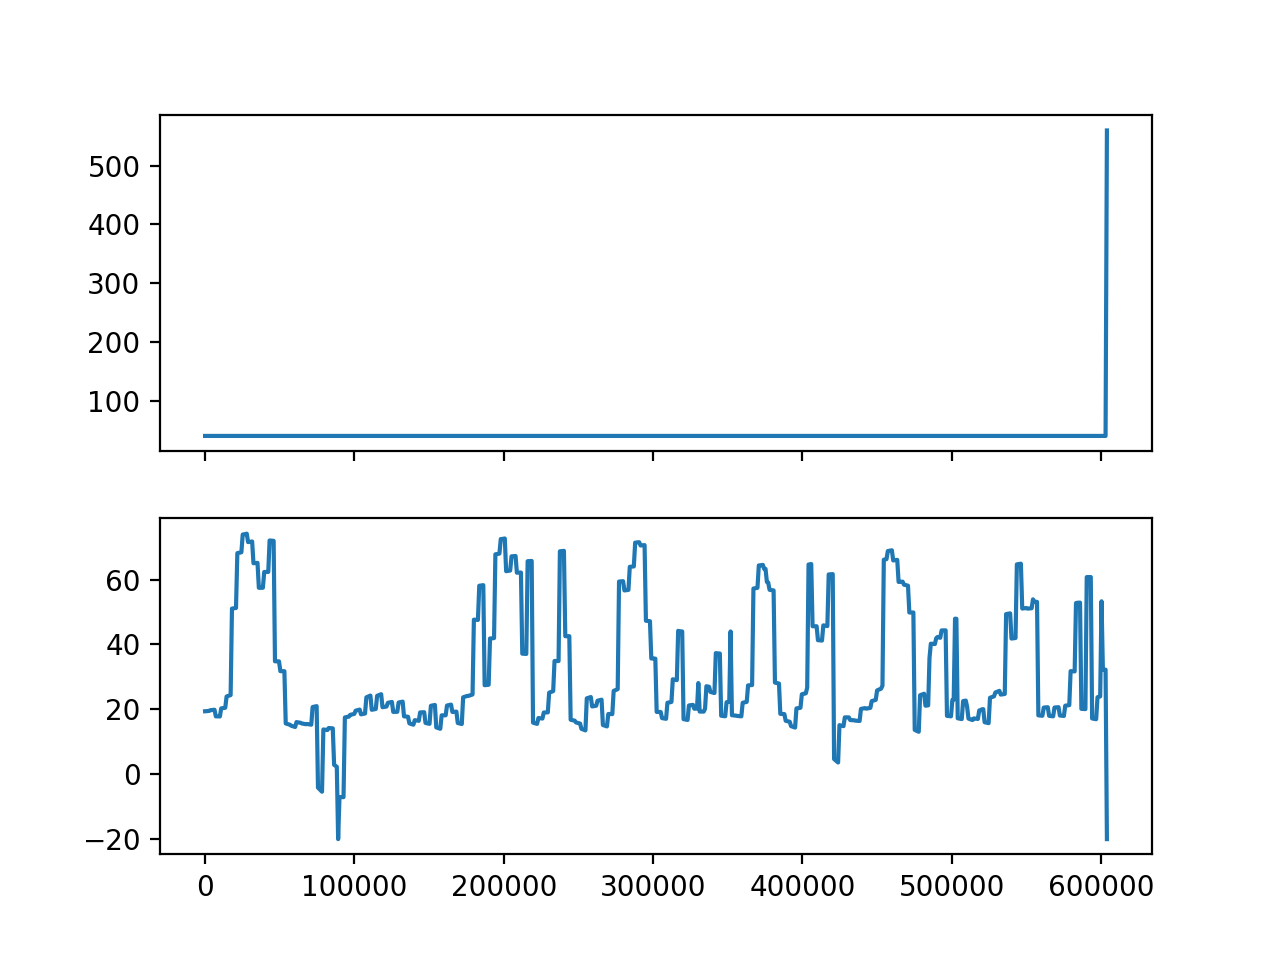

In [18]:
fig_5, ax_5 = plt.subplots(2,1, sharex=True)
ax_5[0].plot(results.link['setting']['V45'])
ax_5[1].plot(results.node['pressure']['J253']-results.node['pressure']['J130'])

# Energy of pumps

In [19]:
energy = economics.pump_energy(results.link['flowrate'], results.node['head'], ctown.wn)
print(energy)


        P1  P10  P100  P1000  P101  P1016  P102  P1022  P1023  P1024  ...  \
0      NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
900    NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
1800   NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
2700   NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
3600   NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
...     ..  ...   ...    ...   ...    ...   ...    ...    ...    ...  ...   
600300 NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
601200 NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
602100 NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
603000 NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   
603900 NaN  NaN   NaN    NaN   NaN    NaN   NaN    NaN    NaN    NaN  ...   

        P999          PU10            PU2           PU5            PU6  \
0

<IPython.core.display.Javascript object>


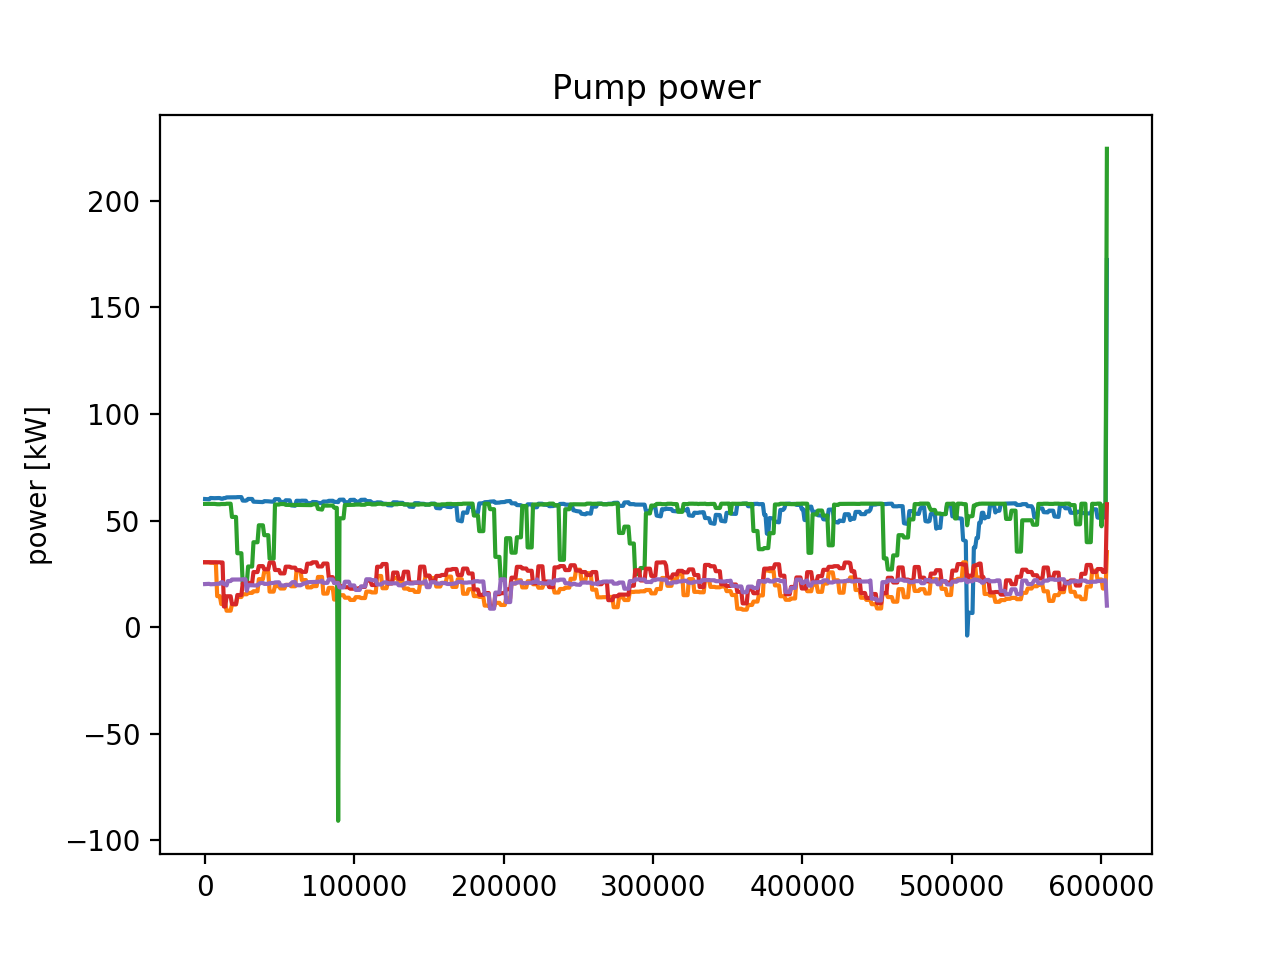

Text(0.5, 1.0, 'Pump power')

In [20]:
linkNames = ctown.getLinkName()
energyToPlot = energy[linkNames[0]] # Pumps
fig_6=plt.figure(0)
plt.plot(energyToPlot/1000)
plt.ylabel('power [kW]')
plt.title('Pump power')

# Controls

<IPython.core.display.Javascript object>


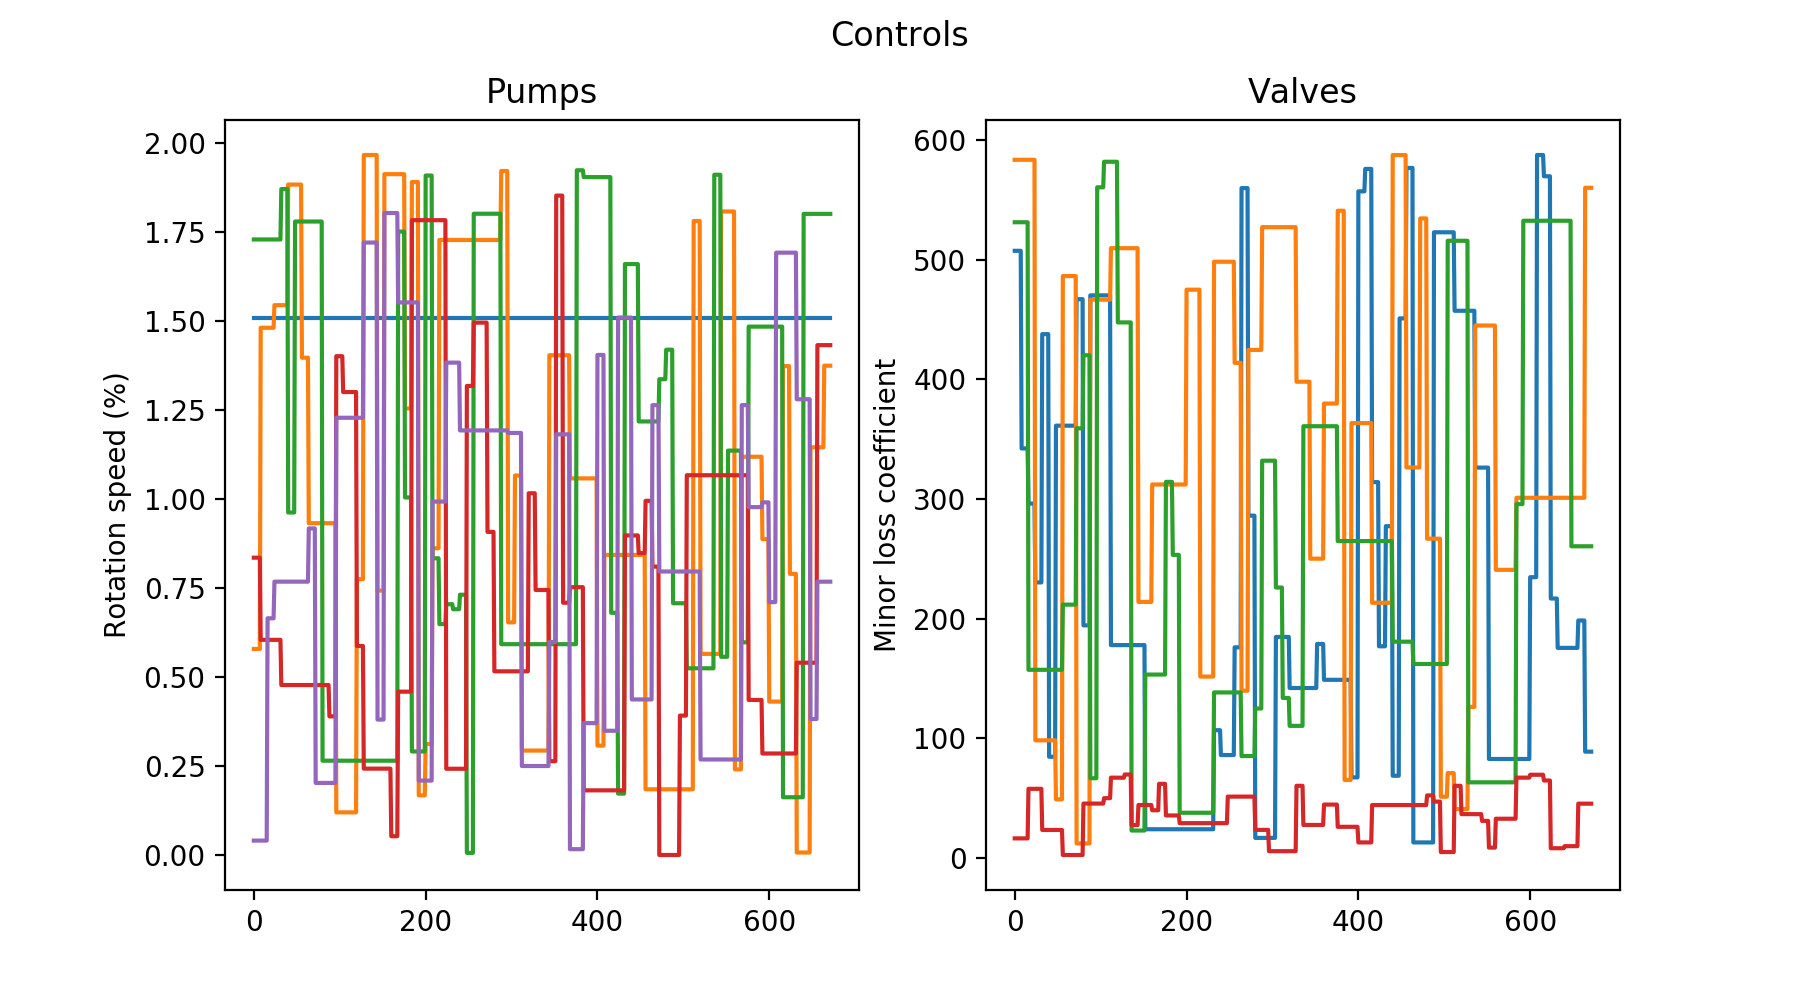

Text(0, 0.5, 'Minor loss coefficient')

In [21]:
fig_7, ax_7 = plt.subplots(1,2, figsize=(9,5))
fig_7.suptitle('Controls', fontsize=12)
ax_7[0].plot(results.setting[linkNames[0]])
ax_7[0].set_title('Pumps')
ax_7[0].set_ylabel('Rotation speed (%)')
ax_7[1].plot(results.setting[linkNames[2]])
ax_7[1].set_title('Valves')
ax_7[1].set_ylabel('Minor loss coefficient')

In [22]:
results.setting[:][0:17]

PU2       PU5      PU6       PU8       PU10       V1     V45      V47  \
0   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
1   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
2   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
3   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
4   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
5   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
6   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
7   1.50924  0.579328  1.72955  0.835681  0.0409636  507.295  583.34  531.153   
8   1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
9   1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
10  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
11  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
12  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
13  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
14  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
15  1.50924   1.48149  1.72955  0.604884  0.0409636   342.16  583.34  531.153   
16  1.50924   1.48149  1.72955  0.604884   0.665372  296.106  583.34  157.205   

         V2  
0     16.35  
1     16.35  
2     16.35  
3     16.35  
4     16.35  
5     16.35  
6     16.35  
7     16.35  
8     16.35  
9     16.35  
10    16.35  
11    16.35  
12    16.35  
13    16.35  
14    16.35  
15    16.35  
16  57.7514

<IPython.core.display.Javascript object>


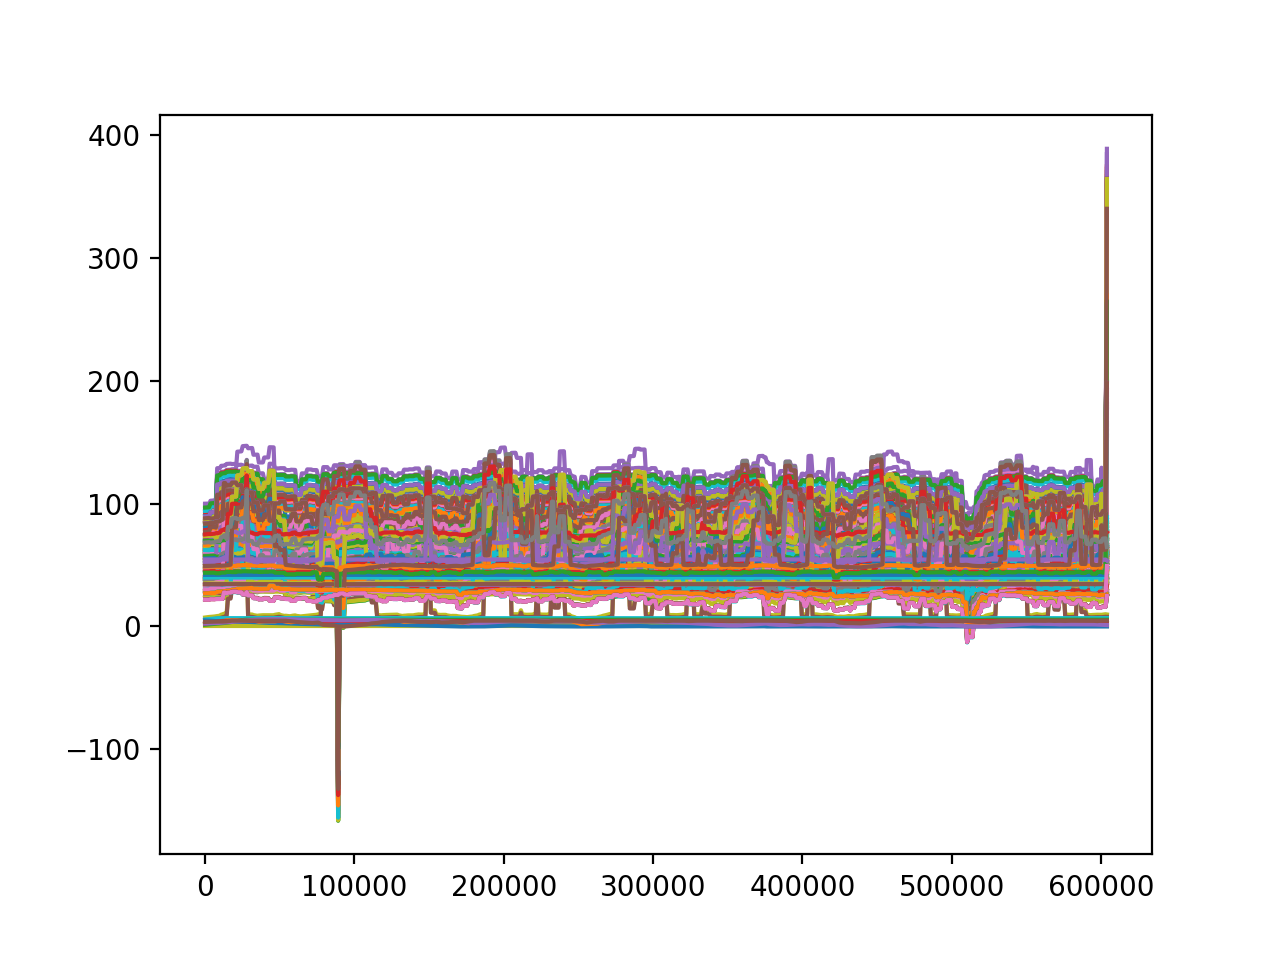

In [23]:
plt.figure()
plt.plot(results.node['pressure'])
plt.show()

<IPython.core.display.Javascript object>


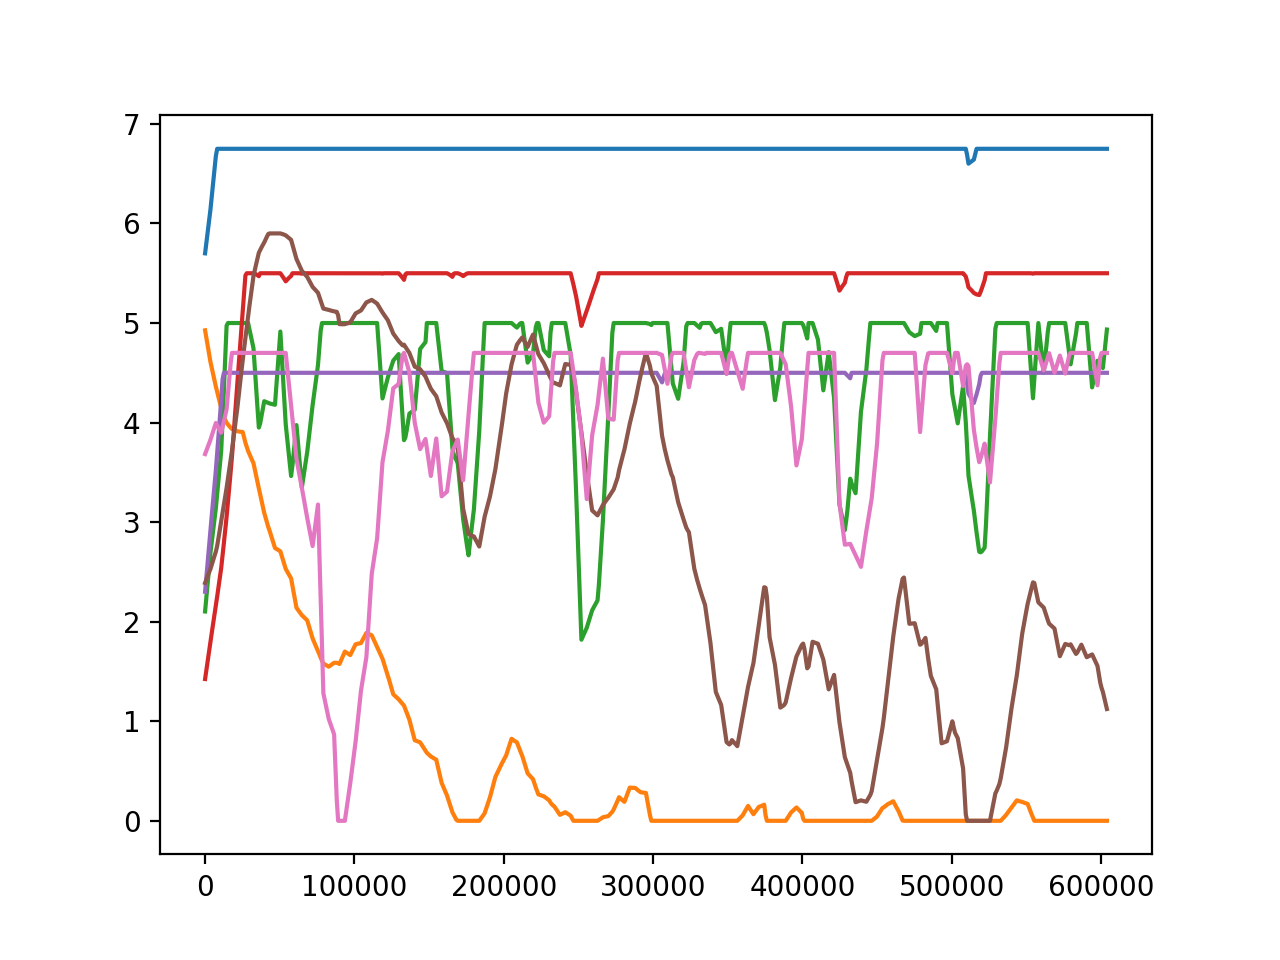

In [24]:
plt.figure()
plt.plot(results.tankElevations)
plt.show()